In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_27360\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [57]:
df

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300
...,...,...,...,...,...,...,...
6332707,Ведущий специалист по сопровождению SIEM платф...,SIEM\nPython\nLinux\nИнформационная безопасность,NaN,300000.0,RUR,Москва,2023-12-09T20:35:54+0300
6332708,PHP-программист,MySQL\nPHP\nPostgreSQL\nHTML\nJavaScript\njQue...,NaN,NaN,NaN,Гомель,2023-12-09T20:48:22+0300
6332709,Motion designer,Adobe After Effect\nОбработка видео\nАнимация\...,400.0,2000.0,EUR,Санкт-Петербург,2023-12-09T21:34:51+0300
6332710,Дизайнер интерьеров,3D Моделирование\nпунктуальность\nArchiCAD\nSk...,NaN,NaN,NaN,Тамбов,2023-12-09T21:47:33+0300


In [58]:
df.head()

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300


In [6]:
df.describe()

,salary_from,salary_to
count,2.969683e+06,1.914401e+06
mean,7.327608e+04,1.151680e+05
std,3.670851e+05,1.021305e+06
min,1.000000e+00,1.000000e+00
25%,2.500000e+04,3.500000e+04
50%,4.000000e+04,6.000000e+04
75%,7.500000e+04,1.000000e+05
max,7.500000e+07,1.000000e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332712 entries, 0 to 6332711
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   name             object 
 1   key_skills       object 
 2   salary_from      float64
 3   salary_to        float64
 4   salary_currency  object 
 5   area_name        object 
 6   published_at     object 
 7   year             object 
dtypes: float64(2), object(6)
memory usage: 386.5+ MB


In [59]:
df.insert(7, "year", df.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [60]:
df['year'].unique()

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [61]:
df.loc[(df['salary_to'].isnull()), 'salary_to'] = df['salary_from']
df.loc[(df['salary_from'].isnull()), 'salary_from'] = df['salary_to']

In [62]:
df.insert(8, "salary_mean", (df['salary_from'] + df['salary_to']) / 2, True)

In [63]:
df_group_year = df.groupby(by="year")

In [64]:
df_group_year

In [65]:
years = [str(x+1) for x in range(2002,2023)]

In [66]:
year_salary = {}
for year in years:
    year_salary[year] = df_group_year.get_group(year)['salary_mean'].mean()

In [67]:
year_salary

{'2003': 1366.9196261682243,
 '2004': 1488.8750578435909,
 '2005': 13331.444468175992,
 '2006': 1522.75100837056,
 '2007': 5604.620313516878,
 '2008': 27478.625961806374,
 '2009': 37548.843039155756,
 '2010': 40958.988536547615,
 '2011': 42359.959922751994,
 '2012': 44540.50981638938,
 '2013': 46218.32997868265,
 '2014': 48482.49351856433,
 '2015': 50654.9710693442,
 '2016': 58261.434461847144,
 '2017': 61724.02487842937,
 '2018': 65563.09670835566,
 '2019': 78212.32842483459,
 '2020': 91582.6133663984,
 '2021': 107873.90080414175,
 '2022': 131633.0689266094,
 '2023': 171844.99024176132}

In [68]:
df_vac = df[df["name"].str.contains("python|питон|пайтон")]

In [69]:
df_group_year_vac = df_vac.groupby(by="year")

In [70]:
year_salary_vac = {}
for year in years:
    try:
        year_salary_vac[year] = df_group_year_vac.get_group(year)['salary_mean'].mean()
    except:
        continue

In [71]:
year_salary_vac

{'2006': 1233.3333333333333,
 '2008': 23500.0,
 '2009': 65714.28571428571,
 '2010': 53727.27272727273,
 '2011': 70000.0,
 '2012': 64999.94117647059,
 '2013': 74273.25581395348,
 '2014': 69134.61538461539,
 '2015': 81600.0,
 '2016': 85140.10416666667,
 '2017': 95284.72222222222,
 '2018': 113536.45833333333,
 '2019': 116166.66666666667,
 '2020': 108902.22222222222,
 '2021': 129425.8865248227,
 '2022': 133061.57024793388,
 '2023': 142105.28455284552}

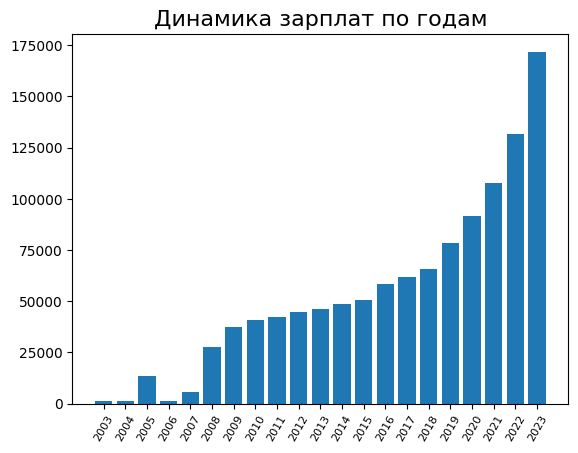

In [72]:
plt.bar(year_salary.keys(),year_salary.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика зарплат по годам',size=16)
plt.show()

In [73]:
df_year_to_html = pd.DataFrame(list(year_salary.items ()), columns = ['Год', 'Средняя ЗП'])

In [78]:
df_year_to_html.to_html('year_to_html.html')

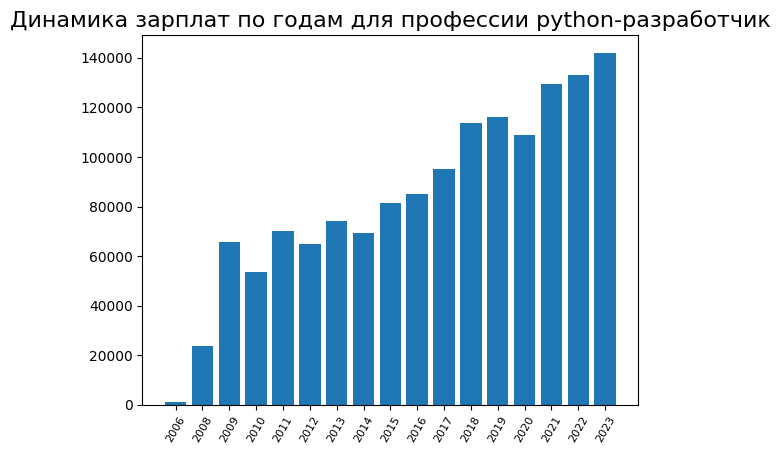

In [75]:
plt.bar(year_salary_vac.keys(),year_salary_vac.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика зарплат по годам для профессии python-разработчик',size=16)
plt.show()

In [76]:
df_year_vac_to_html = pd.DataFrame(list(year_salary_vac.items ()), columns = ['Год', 'Средняя ЗП'])

In [79]:
df_year_vac_to_html.to_html('year_vac_to_html')